# 원문 - 추출요약문 데이터쌍 구축
- 데이터 전처리, 종결어미 전환을 거쳤습니다.
- 훈련 데이터 추출
    - condition_2 & condition_3 & condition_4
    - 원문 길이(형태소 개수) 200 이상
    - 원문-추출요약문 길이(형태소 개수) 차이 0 이상
    - 모든 평가점수 3점 이상
- 총 25만 7천여개의 데이터입니다.
    - 훈련 데이터(train) : (148463, 2)
    - 검증 데이터(validation) : (63628, 2)
    - 테스트 데이터(test) : (43342, 2)

In [1]:
%%time

%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')


import os
import csv
import pandas as pd

import warnings
warnings.filterwarnings('ignore')


file_name = os.getenv('HOME')+'/aiffel/aeumgil/AIhub/data/aihub_ori_ext.csv'
df = pd.read_csv(file_name)

CPU times: user 1min 2s, sys: 6.69 s, total: 1min 9s
Wall time: 1min 14s


In [2]:
print(df.shape)
df.head()

(266616, 34)


,original_text,ori_char_cnt,ori_pos,only_ori_pos,ori_morph_cnt,ori_EC,ori_EF,ori_SF,ori_NNG,ori_NNP,...,ext_MAG,ext_MAJ,readable,accurate,informative,trustworthy,title,media_sub_type,size,de_ori2ext_morph
0,전라남도가 쌀 과잉문제를 근본적으로 해결하기 위해 올해부터 시행하는 쌀 생산조정제를...,927,"[('전라남도', 'NNP'), ('가', 'JKS'), ('쌀', 'NNG'), ...","['NNP', 'JKS', 'NNG', 'NNG', 'NNG', 'JKO', 'NN...",419,"['위해', '벼', '으면', '해', '나', '해', '해야', '도와', '...","['다', '다', '다', '다', '된다', '다', '다', '된다', '한다...","['.', '.', '.', '.', '.', '.', '.', '.', '.', ...","['쌀', '과잉', '문제', '근본', '해결', '올해', '시행', '쌀',...","['전라남도', '전남', '전남', '최향', '전라남도']",...,[],[],4,3,3,3,"논 타작물 재배, 2월 말까지 신청하세요",지역지,small,322
1,여수시는 원도심 일대에서 추진된 컬러빌리지 사업을 지난해 말 마무리하며 색채와 빛의...,764,"[('여수시', 'NNP'), ('는', 'JX'), ('원', 'NNG'), ('...","['NNP', 'JX', 'NNG', 'NNG', 'NNG', 'JKB', 'NNG...",339,"['며', '면', '따라', '면', '어', '통해', '고', '해', '고'...","['다', '다', '다', '다', '다', '다', '다', '다', '다', ...","['.', '.', '.', '.', '.', '.', '.', '.', '.', ...","['원', '도심', '일대', '추진', '컬러', '빌리지', '사업', '지난...",['여수시'],...,"['알록달록', '함께']",[],4,4,5,4,"여수시, 컬러빌리지 마무리...‘색채와 빛’도시 완성",지역지,small,249
2,전남드래곤즈(사장 신승재)는 지난 4일 구봉산 해맞이 행사를 통해 새해 각오를 다졌...,1066,"[('전남', 'NNP'), ('드래곤즈', 'NNP'), ('(', 'SSO'),...","['NNP', 'NNP', 'SSO', 'NNG', 'NNP', 'SSC', 'JX...",454,"['통해', '올라', '며', '면서', '며', '위해', '어', '자', '...","['다', '다', '다', '다', '다', '다', '다', '다', '다', ...","['.', '.', '.', '.', '.', '.', '.', '.', '.', ...","['사장', '해맞이', '행사', '새해', '각오', '임직원', '선수단', ...","['전남', '드래곤즈', '신승재', '구봉산', '구봉산', '전남', '드래곤...",...,"['이내', '다']",['한편'],4,4,4,4,“새해 정기 받고 올해는 반드시 일내자!”,지역지,medium,355
3,광양시는 오는 11일부터 24일까지 농업인교육관과 읍면동 회의실에서 농업인 1050...,746,"[('광양시', 'NNP'), ('는', 'JX'), ('오', 'VV'), ('는...","['NNP', 'JX', 'VV', 'ETM', 'SN', 'NNBC', 'JX',...",325,"['면', '어려워짐', '따라', '고', '위해', '어', '도록', '고',...","['한다', '다', '다룬다', '진다', '다', '다', '다', '된다']","['.', '.', '.', '.', '.', '.', '.', '.']","['농업', '인교', '육관', '읍', '회의실', '농업', '대상', '새해...","['광양시', '다래', '이정헌', '전남', '광양시', '농업기술센터']",...,[],[],4,4,5,4,"농업인 역량 강화, 새해 실용교육 실시",지역지,small,225
4,타이완의 크루즈관광객 4000여명이 올해 두 차례에 걸쳐 여수에 입항한다. 전라남도...,978,"[('타이완', 'NNP'), ('의', 'JKG'), ('크루즈', 'NNP'),...","['NNP', 'JKG', 'NNP', 'NNG', 'SN', 'XSN', 'NNB...",402,"['걸쳐', '고', '해', '한다고', '위해', '따라', '해', '해', ...","['한다', '다', '다', '다', '한다', '다', '다', '다', '다'...","['.', '.', '.', '.', '.', '.', '.', '.', '.', ...","['관광객', '올해', '차례', '입항', '올해', '선사', '스타', '급...","['타이완', '크루즈', '여수', '전라남도', '홍콩', '크루즈', '크루즈...",...,[],[],4,4,4,4,타이완 크루즈관광객 4천여명‘전남’온다,지역지,small,289


In [3]:
df.columns

Index(['original_text', 'ori_char_cnt', 'ori_pos', 'only_ori_pos',
       'ori_morph_cnt', 'ori_EC', 'ori_EF', 'ori_SF', 'ori_NNG', 'ori_NNP',
       'ori_SN', 'ori_MAG', 'ori_MAJ', 'converted_ext', 'ext_char_cnt',
       'ext_pos', 'only_ext_pos', 'ext_morph_cnt', 'ext_EC', 'ext_EF',
       'ext_SF', 'ext_NNG', 'ext_NNP', 'ext_SN', 'ext_MAG', 'ext_MAJ',
       'readable', 'accurate', 'informative', 'trustworthy', 'title',
       'media_sub_type', 'size', 'de_ori2ext_morph'],
      dtype='object')

In [4]:
def show_data(df, step=1000 , threshold=5 ):
    cnt = 0
    for i in range(1, df.shape[0], step):
        print("{}번째 원문의 길이:{}\n{}\n\n{}번째 추출요약의 길이:{}\n{}\n\n"\
              .format(i, df['ori_morph_cnt'][i], df['original_text'][i],\
                      i, df['ext_morph_cnt'][i], df['converted_ext'][i]))
        
        if cnt > threshold: break 
        cnt += 1
            
show_data(df)

1번째 원문의 길이:339
여수시는 원도심 일대에서 추진된 컬러빌리지 사업을 지난해 말 마무리하며 색채와 빛의 도시를 완성했다. 시에 따르면 총 사업비 8억원이 투입된 컬러빌리지 사업은 낮에는 색채, 밤에는 빛 을 주제로 지난해 초 착공에 들어갔다. 컬러빌리지는 색채를 이용한 경관개선사업으로 사업완료에 따라 고소천사벽화마을과 자산마을은 알록달록 색깔 옷을 입었다. 특히 자산마을 주택 70여 동은 동백꽃 색으로 새 단장을 마쳤다. 마을 옆을 지나는 해상케이블카에서 내려다보면 동백꽃 한 송이가 피어있는 모습으로 SNS 등을 통해 입소문을 타고 있다. 고소천사벽화마을 주택 130여 동도 지붕은 동백꽃 색, 벽면은 파스텔 톤 색상으로 변신해 이국적인 분위기를 내고 있다. 마을 내 옹벽과 비탈면은 패턴벽화와 야간조명이 설치돼 포토존으로 인기를 끌고 있다. 컬러빌리지 사업은 추진 전반에 마을 주민이 적극 참여했다는 점에서 좋은 평가를 받고 있다. 시는 사업대상이 사유시설인 만큼 계획단계부터 주민들의 의견을 들었다. 사업 시행과 준공 과정에서도 주민들의 참여를 유도해 민관이 함께 만들어가는 경관사업의 좋은 사례를 만들었다. 시 관계자는"컬러빌리지 사업은 주민들의 적극적인 관심과 참여가 만들어낸 값진 성과물"이라며"돌산공원, 해상케이블카, 남산공원, 돌산대교 등에서 빛과 색채로 물들어가는 여수의 낭만을 만끽하시기 바란다"고 말했다.

1번째 추출요약의 길이:90
여수시는 원도심 일대에서 추진된 컬러빌리지 사업을 지난해 말 마무리하며 색채와 빛의 도시를 완성했어요. 컬러빌리지는 색채를 이용한 경관개선사업으로 사업완료에 따라 고소천사벽화마을과 자산마을은 알록달록 색깔 옷을 입었어요. 사업 시행과 준공 과정에서도 주민들의 참여를 유도해 민관이 함께 만들어가는 경관사업의 좋은 사례를 만들었어요.


1001번째 원문의 길이:438
2019 책 읽어주는 문화봉사단 이 지난 26일, 백운노인복지센터를 끝으로 상반기 현장 활동을 마무리했다. 책 읽어주는 문화봉사단은 50대 이상의 문화봉

## 통계분석

In [5]:
df.describe()

,ori_char_cnt,ori_morph_cnt,ext_char_cnt,ext_morph_cnt,readable,accurate,informative,trustworthy,de_ori2ext_morph
count,266616.000000,266616.000000,266616.000000,266616.000000,266616.000000,266616.000000,266616.000000,266616.000000,266616.000000
mean,1066.677788,466.419000,251.188916,120.711281,3.723629,3.761323,3.547897,3.771495,345.707718
std,302.561532,141.452082,71.598595,34.218863,0.892048,0.848068,0.918481,0.853660,146.753063
min,700.000000,7.000000,38.000000,21.000000,0.000000,0.000000,0.000000,0.000000,-223.000000
25%,821.000000,355.000000,200.000000,96.000000,3.000000,3.000000,3.000000,3.000000,234.000000
50%,988.000000,432.000000,243.000000,117.000000,4.000000,4.000000,4.000000,4.000000,312.000000
75%,1245.000000,549.000000,293.000000,141.000000,4.000000,4.000000,4.000000,4.000000,432.000000
max,2000.000000,1032.000000,908.000000,460.000000,5.000000,5.000000,5.000000,5.000000,953.000000


In [6]:
#- 원문-추출요약문 길이차가 0이하인 경우, 81개

tmp = df[df['de_ori2ext_morph'] <= 0][['original_text','converted_ext','ori_morph_cnt','ext_morph_cnt']]
print(tmp.shape)
tmp.describe()

(81, 4)


,ori_morph_cnt,ext_morph_cnt
count,81.000000,81.000000
mean,131.716049,171.506173
std,110.530000,87.870946
min,7.000000,74.000000
25%,53.000000,104.000000
50%,98.000000,142.000000
75%,174.000000,212.000000
max,401.000000,401.000000


In [8]:
#- 원문-추출요약문 길이차가 0이하인 경우 사례

tmp.reset_index(inplace=True)

for i in range(3): 
    print('{}번째 원문:{}\n'.format(i+1,tmp['original_text'][i]))
    print('{}번째 추출요약문:{}'.format(i+1,tmp['converted_ext'][i]))
    print('-'*70)

1번째 원문:여수광양항만공사(사장 방희석, 이하 공사)는 2018년도 승진 및 전보 인사를 단행했다고 지난 26일 밝혔다. 공사는 광양항 활성화 및 물동량 창출을 위해 항만운영팀 , 글로벌마케팅팀 , 물류단지팀 의 인력을 보강하고자 인사를 실시하게 됐다고 설명했다. 특히 정부 정책의 적극적인 이행과 일자리 창출 등 사회적 가치 실현을 위해 가치경영팀 을 신설한 것도 이번 인사의 요인이라고 덧붙였다.

1번째 추출요약문:여수광양항만공사(사장 방희석, 이하 공사)는 2018년도 승진 및 전보 인사를 단행했다고 지난 26일 밝혔어요. 공사는 광양항 활성화 및 물동량 창출을 위해 항만운영팀 , 글로벌마케팅팀 , 물류단지팀 의 인력을 보강하고자 인사를 실시하게 됐다고 설명했어요. 특히 정부 정책의 적극적인 이행과 일자리 창출 등 사회적 가치 실현을 위해 가치경영팀 을 신설한 것도 이번 인사의 요인이라고 덧붙였어요.
----------------------------------------------------------------------
2번째 원문:걸그룹 블랙핑크가 태국 방콕 콘서트 3회 매진, 3만 관객을 동원하며 월드투어의 첫걸음을 뗐다. 블랙핑크의 데뷔 첫 월드투어 BLACKPINK 2019 WORLD TOUR with KIA . YG엔터테인먼트 제공.

2번째 추출요약문:걸그룹 블랙핑크가 태국 방콕 콘서트 3회 매진, 3만 관객을 동원하며 월드투어의 첫걸음을 뗐어요. 블랙핑크의 데뷔 첫 월드투어 BLACKPINK 2019 WORLD TOUR with KIA 는 멤버 리사의 고향인 방콕에서 시작했어요. 방콕 콘서트는 지난 12, 13일 공연과 추가 오픈된 11일 공연이 모두 매진을 기록하며 현지 팬들의 뜨거운 관심을 받았어요.
----------------------------------------------------------------------
3번째 원문:수소차 테마주 로 주가가 급등한 풍국주정 회장이 보유한 주식 가치는 지난해 말보다 41억8천만원(

<AxesSubplot:>

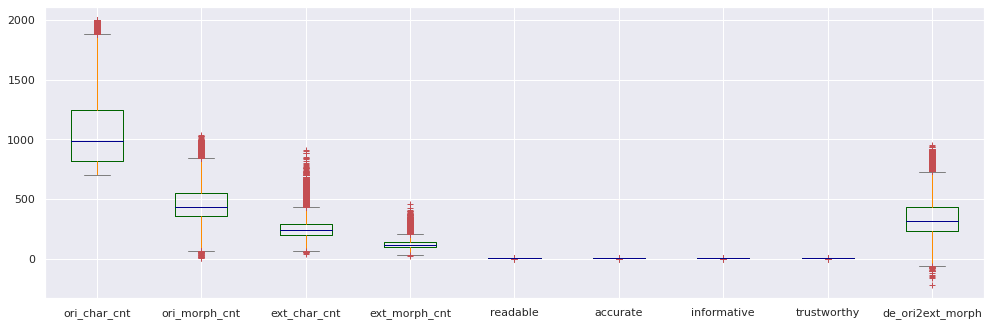

In [9]:
#- 박스플롯 (정성적 이상치 탐색)

sns.set(rc = {'figure.figsize':(15,5)})
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange', 'medians': 'DarkBlue', 'caps': 'Gray'}
df.boxplot(color=color, sym='r+')

In [10]:
import numpy as np

def find_outlier_by_Tukey(data):
    '''
    사분위 범위(IQR, interquartile range)를 기반으로 하는 Tukey Fences.
    '''
    q1, q3 = np.percentile(data, [25, 75])
    
    iqr = q3 - q1
    
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    
    mask = np.where((data > upper_bound) | (data < lower_bound))
    
    return lower_bound, upper_bound, mask

In [11]:
#- 원문-추출요약문의 문장길이(음운 및 형태소 단위) IQR 이상치 추출

lst = ['ori_char_cnt','ori_morph_cnt','ext_char_cnt','ext_morph_cnt','de_ori2ext_morph']
masks = []

for i in lst:
    lb, ub, mask = find_outlier_by_Tukey(df[i])
    masks += mask[0].tolist()
    print(f'{i}의 이상치 (상한, 하한) : ({ub},{lb})\n')
    globals()['{}_outlier'.format(i)]= df.iloc[mask]

masks = list(set(masks))


ori_char_cnt의 이상치 (상한, 하한) : (1881.0,185.0)

ori_morph_cnt의 이상치 (상한, 하한) : (840.0,64.0)

ext_char_cnt의 이상치 (상한, 하한) : (432.5,60.5)

ext_morph_cnt의 이상치 (상한, 하한) : (208.5,28.5)

de_ori2ext_morph의 이상치 (상한, 하한) : (729.0,-63.0)



In [12]:
#- 이상치 제거 후 26만 6천개 -> 25만 5천 개
df.drop(masks, inplace=True)
print(df.shape)

(255433, 34)


<AxesSubplot:>

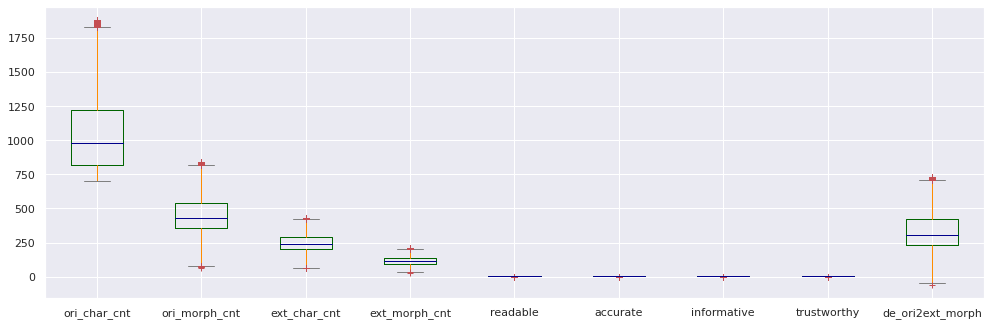

In [13]:
#- 이상치 제거 이후 박스플롯

sns.set(rc = {'figure.figsize':(15,5)})
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange', 'medians': 'DarkBlue', 'caps': 'Gray'}
df.boxplot(color=color, sym='r+')

In [14]:
condition_1 = (df['ori_morph_cnt'] <= 512) #- 원문 길이(형태소 개수) 512 이상인 경우 제외
condition_2 = (df['ori_morph_cnt'] >= 200) #- 원문 길이(형태소 개수) 200 이하인 경우 제외
condition_3 = (df['de_ori2ext_morph'] > 0) #- 원문-추출요약문 길이차가 0이하인 경우 제외
condition_4 = (df['readable'] >= 3) & (df['accurate'] >= 3) & (df['informative'] >= 3) & (df['trustworthy'] >= 3)

In [15]:
#- condition_1
#- 원문 길이(형태소 개수) 512이하 (kobart-sum 입력 문장길이) ,18만개

print(df[condition_1].shape)
df[condition_1].describe()

(179234, 34)


,ori_char_cnt,ori_morph_cnt,ext_char_cnt,ext_morph_cnt,readable,accurate,informative,trustworthy,de_ori2ext_morph
count,179234.000000,179234.000000,179234.000000,179234.000000,179234.000000,179234.000000,179234.000000,179234.000000,179234.000000
mean,897.214563,386.231898,249.525955,119.595523,3.774429,3.788807,3.523918,3.790291,266.636375
std,140.421298,64.208533,64.334673,30.656597,0.875130,0.839973,0.919906,0.847472,70.819138
min,700.000000,67.000000,62.000000,31.000000,0.000000,0.000000,0.000000,0.000000,-62.000000
25%,778.000000,336.000000,202.000000,97.000000,3.000000,3.000000,3.000000,3.000000,214.000000
50%,876.000000,380.000000,245.000000,117.000000,4.000000,4.000000,3.000000,4.000000,262.000000
75%,999.000000,437.000000,292.000000,140.000000,4.000000,4.000000,4.000000,4.000000,319.000000
max,1880.000000,512.000000,432.000000,208.000000,5.000000,5.000000,5.000000,5.000000,471.000000


In [16]:
#- condition_2
#- 원문 길이(형태소 개수) 200 이상, 25만 5천개

print(df[condition_2].shape)
df[condition_2].describe()

(255177, 34)


,ori_char_cnt,ori_morph_cnt,ext_char_cnt,ext_morph_cnt,readable,accurate,informative,trustworthy,de_ori2ext_morph
count,255177.000000,255177.000000,255177.000000,255177.000000,255177.000000,255177.000000,255177.000000,255177.000000,255177.000000
mean,1047.236945,457.545355,247.437982,118.892345,3.732115,3.766053,3.547056,3.775160,338.653009
std,278.111345,129.176982,64.470077,30.805776,0.887895,0.845778,0.917292,0.851629,133.693193
min,700.000000,200.000000,61.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,817.000000,354.000000,200.000000,96.000000,3.000000,3.000000,3.000000,3.000000,234.000000
50%,978.000000,427.000000,242.000000,116.000000,4.000000,4.000000,4.000000,4.000000,309.000000
75%,1221.000000,539.000000,290.000000,139.000000,4.000000,4.000000,4.000000,4.000000,423.000000
max,1881.000000,840.000000,432.000000,208.000000,5.000000,5.000000,5.000000,5.000000,729.000000


In [17]:
#- condition_3
#- 원문-추출요약문 길이(형태소 개수) 차이 0 이상, 25만 5천개

print(df[condition_3].shape)
df[condition_3].describe()

(255405, 34)


,ori_char_cnt,ori_morph_cnt,ext_char_cnt,ext_morph_cnt,readable,accurate,informative,trustworthy,de_ori2ext_morph
count,255405.000000,255405.000000,255405.000000,255405.000000,255405.000000,255405.000000,255405.000000,255405.000000,255405.000000
mean,1047.128831,457.278330,247.384511,118.865934,3.732108,3.766046,3.546861,3.775036,338.412396
std,278.112663,129.431924,64.489144,30.814936,0.887970,0.845868,0.917410,0.851757,133.879726
min,700.000000,67.000000,61.000000,30.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,817.000000,354.000000,200.000000,96.000000,3.000000,3.000000,3.000000,3.000000,234.000000
50%,978.000000,427.000000,242.000000,116.000000,4.000000,4.000000,4.000000,4.000000,309.000000
75%,1221.000000,539.000000,290.000000,139.000000,4.000000,4.000000,4.000000,4.000000,423.000000
max,1881.000000,840.000000,432.000000,208.000000,5.000000,5.000000,5.000000,5.000000,729.000000


In [18]:
#- condition_1 & condition_3
#- 원문 길이(형태소 개수) 512이하 (kobart-sum 입력 문장길이)
#- 원문-추출요약문 길이(형태소 개수) 차이 0 이상
#- 18만 개

print(df[condition_1 & condition_3].shape)
df[condition_1 & condition_3].describe()

(179206, 34)


,ori_char_cnt,ori_morph_cnt,ext_char_cnt,ext_morph_cnt,readable,accurate,informative,trustworthy,de_ori2ext_morph
count,179206.000000,179206.000000,179206.000000,179206.000000,179206.000000,179206.000000,179206.000000,179206.000000,179206.000000
mean,897.195819,386.273060,249.520898,119.593289,3.774466,3.788818,3.523961,3.790320,266.679771
std,140.385262,64.127472,64.331613,30.655466,0.875082,0.839953,0.919901,0.847441,70.739176
min,700.000000,67.000000,62.000000,31.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,778.000000,336.000000,202.000000,97.000000,3.000000,3.000000,3.000000,3.000000,214.000000
50%,876.000000,380.000000,245.000000,117.000000,4.000000,4.000000,3.000000,4.000000,262.000000
75%,999.000000,437.000000,292.000000,140.000000,4.000000,4.000000,4.000000,4.000000,319.000000
max,1880.000000,512.000000,432.000000,208.000000,5.000000,5.000000,5.000000,5.000000,471.000000


In [19]:
#- condition_2 & condition_3
#- 원문 길이(형태소 개수) 200 이상
#- 원문-추출요약문 길이(형태소 개수) 차이 0 이상
#- 25만 5천 개  

print(df[condition_2 & condition_3].shape)
df[condition_2 & condition_3].describe()

(255176, 34)


,ori_char_cnt,ori_morph_cnt,ext_char_cnt,ext_morph_cnt,readable,accurate,informative,trustworthy,de_ori2ext_morph
count,255176.000000,255176.000000,255176.000000,255176.000000,255176.000000,255176.000000,255176.000000,255176.000000,255176.000000
mean,1047.238122,457.546333,247.437310,118.891996,3.732118,3.766056,3.547058,3.775163,338.654337
std,278.111255,129.176290,64.469309,30.805331,0.887896,0.845779,0.917293,0.851629,133.691774
min,700.000000,200.000000,61.000000,30.000000,0.000000,0.000000,0.000000,0.000000,16.000000
25%,817.000000,354.000000,200.000000,96.000000,3.000000,3.000000,3.000000,3.000000,234.000000
50%,978.000000,427.000000,242.000000,116.000000,4.000000,4.000000,4.000000,4.000000,309.000000
75%,1221.000000,539.000000,290.000000,139.000000,4.000000,4.000000,4.000000,4.000000,423.000000
max,1881.000000,840.000000,432.000000,208.000000,5.000000,5.000000,5.000000,5.000000,729.000000


In [20]:
#- condition_1 & condition_2 & condition_3
#- 원문 길이(형태소 개수) 512이하 (kobart-sum 입력 문장길이)
#- 원문 길이(형태소 개수) 200 이상
#- 원문-추출요약문 길이(형태소 개수) 차이 0 이상
#- 17만 8천 개  

print(df[condition_1 & condition_2 & condition_3].shape)
df[condition_1 & condition_2 & condition_3].describe()

(178977, 34)


,ori_char_cnt,ori_morph_cnt,ext_char_cnt,ext_morph_cnt,readable,accurate,informative,trustworthy,de_ori2ext_morph
count,178977.000000,178977.000000,178977.000000,178977.000000,178977.000000,178977.000000,178977.000000,178977.000000,178977.000000
mean,897.159803,386.564313,249.598909,119.631377,3.774535,3.788861,3.524213,3.790521,266.932936
std,140.182505,63.637521,64.300497,30.640595,0.874956,0.839816,0.919745,0.847248,70.418195
min,700.000000,200.000000,62.000000,31.000000,0.000000,0.000000,0.000000,0.000000,16.000000
25%,778.000000,336.000000,202.000000,97.000000,3.000000,3.000000,3.000000,3.000000,214.000000
50%,876.000000,380.000000,245.000000,117.000000,4.000000,4.000000,3.000000,4.000000,262.000000
75%,999.000000,437.000000,292.000000,140.000000,4.000000,4.000000,4.000000,4.000000,319.000000
max,1880.000000,512.000000,432.000000,208.000000,5.000000,5.000000,5.000000,5.000000,471.000000


In [21]:
#- condition_2 & condition_3 & condition_4
#- 원문 길이(형태소 개수) 200 이상
#- 원문-추출요약문 길이(형태소 개수) 차이 0 이상
#- 모든 평가점수 3점 이상
#- 21만 1천 개  

print(df[condition_2 & condition_3 & condition_4].shape)
df[condition_2 & condition_3 & condition_4].describe()

(212091, 34)


,ori_char_cnt,ori_morph_cnt,ext_char_cnt,ext_morph_cnt,readable,accurate,informative,trustworthy,de_ori2ext_morph
count,212091.000000,212091.000000,212091.000000,212091.000000,212091.000000,212091.000000,212091.000000,212091.000000,212091.000000
mean,1044.926758,456.517698,247.668548,118.939441,3.917054,3.927894,3.769618,3.935358,337.578257
std,276.548409,128.278235,64.062213,30.622244,0.720705,0.718429,0.739007,0.726429,132.859483
min,700.000000,200.000000,62.000000,30.000000,3.000000,3.000000,3.000000,3.000000,23.000000
25%,817.000000,354.000000,201.000000,96.000000,3.000000,3.000000,3.000000,3.000000,234.000000
50%,976.000000,426.000000,242.000000,116.000000,4.000000,4.000000,4.000000,4.000000,308.000000
75%,1217.000000,537.000000,290.000000,139.000000,4.000000,4.000000,4.000000,4.000000,421.000000
max,1881.000000,840.000000,432.000000,208.000000,5.000000,5.000000,5.000000,5.000000,729.000000


In [22]:
#- condition_1 & condition_2 & condition_3 & condition_4
#- 원문 길이(형태소 개수) 512이하 (kobart-sum 입력 문장길이)
#- 원문 길이(형태소 개수) 200 이상
#- 원문-추출요약문 길이(형태소 개수) 차이 0 이상
#- 모든 평가점수 3점 이상
#- 15만 개  

print(df[condition_1 & condition_2 & condition_3 & condition_4].shape)
df[condition_1 & condition_2 & condition_3 & condition_4].describe()

(149621, 34)


,ori_char_cnt,ori_morph_cnt,ext_char_cnt,ext_morph_cnt,readable,accurate,informative,trustworthy,de_ori2ext_morph
count,149621.000000,149621.000000,149621.000000,149621.000000,149621.000000,149621.000000,149621.000000,149621.000000,149621.000000
mean,897.174655,386.737851,249.891178,119.707534,3.940837,3.939360,3.752160,3.942521,267.030317
std,139.730699,63.300691,63.879098,30.463964,0.723100,0.719683,0.739285,0.727731,70.108857
min,700.000000,200.000000,62.000000,31.000000,3.000000,3.000000,3.000000,3.000000,23.000000
25%,778.000000,336.000000,203.000000,97.000000,3.000000,3.000000,3.000000,3.000000,214.000000
50%,876.000000,381.000000,245.000000,117.000000,4.000000,4.000000,4.000000,4.000000,262.000000
75%,999.000000,437.000000,292.000000,140.000000,4.000000,4.000000,4.000000,4.000000,319.000000
max,1870.000000,512.000000,432.000000,208.000000,5.000000,5.000000,5.000000,5.000000,468.000000


In [23]:
df.rename(columns={'original_text':'original','converted_ext':'ext'}, inplace=True)


In [24]:
#- condition_2 & condition_3 & condition_4
#- 21만 3천개
condition = condition_2 & condition_3 & condition_4
train = df[condition][['original','ext']]
print(train.shape)

#- not(condition_2 & condition_3 & condition_4)
#- 4만 3천개
test = df[~condition][['original','ext']]
print(test.shape)

(212091, 2)
(43342, 2)


In [25]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(train, test_size=0.3)

print(train.shape)
print(val.shape)
print(test.shape)

(148463, 2)
(63628, 2)
(43342, 2)


In [26]:
train.to_csv('train_v3_ori_ext.csv',index=False)
val.to_csv('val_v3_ori_ext.csv',index=False)
test.to_csv('test_v3_ori_ext.csv',index=False)